## 228 - Adding Station Lats and Lons

[Youtube](https://www.youtube.com/watch?v=mzcXqm5wbBI)

In [1]:
import metpy.io

In [2]:
import metpy
metpy.__version__

'1.3.1'

In [3]:
metpy.io.station_info['PADK']

Station(id='PADK', synop_id=704540, name='Adak Nas', state='AK', country='US', longitude=-176.65, latitude=51.88, altitude=4, source='/home/jessica/.cache/metpy/v1.3.1/sfstns.tbl')

In [4]:
from datetime import datetime
from siphon.simplewebservice.iastate import IAStateUpperAir

In [5]:
date = datetime(2022, 4, 11, 12)

In [6]:
df = IAStateUpperAir.request_all_data(date)
df

,pressure,height,temperature,dewpoint,direction,speed,station,time,u_wind,v_wind
0,952.0,386.0,-0.5,-4.3,60.0,6.0,CWPL,2022-04-11 12:00:00,-5.196152,-3.000000
1,947.0,428.0,0.4,-11.6,NaN,NaN,CWPL,2022-04-11 12:00:00,NaN,NaN
2,935.0,530.0,1.0,-9.0,NaN,NaN,CWPL,2022-04-11 12:00:00,NaN,NaN
3,929.0,582.0,1.2,-9.8,NaN,NaN,CWPL,2022-04-11 12:00:00,NaN,NaN
4,926.0,609.0,NaN,NaN,105.0,14.0,CWPL,2022-04-11 12:00:00,-13.522962,3.623467
...,...,...,...,...,...,...,...,...,...,...
12782,8.4,32026.0,-50.1,-83.1,NaN,NaN,KYXY,2022-04-11 12:00:00,NaN,NaN
12783,7.0,33220.0,-48.3,-81.3,70.0,25.0,KYXY,2022-04-11 12:00:00,-23.492316,-8.550504
12784,6.7,33528.0,NaN,NaN,60.0,24.0,KYXY,2022-04-11 12:00:00,-20.784610,-12.000000
12785,5.9,34349.0,-45.7,-79.7,NaN,NaN,KYXY,2022-04-11 12:00:00,NaN,NaN


In [7]:
df = metpy.io.add_station_lat_lon(df, stn_var = 'station')
df

,pressure,height,temperature,dewpoint,direction,speed,station,time,u_wind,v_wind,latitude,longitude
0,952.0,386.0,-0.5,-4.3,60.0,6.0,CWPL,2022-04-11 12:00:00,-5.196152,-3.000000,51.47,-90.2
1,947.0,428.0,0.4,-11.6,NaN,NaN,CWPL,2022-04-11 12:00:00,NaN,NaN,51.47,-90.2
2,935.0,530.0,1.0,-9.0,NaN,NaN,CWPL,2022-04-11 12:00:00,NaN,NaN,51.47,-90.2
3,929.0,582.0,1.2,-9.8,NaN,NaN,CWPL,2022-04-11 12:00:00,NaN,NaN,51.47,-90.2
4,926.0,609.0,NaN,NaN,105.0,14.0,CWPL,2022-04-11 12:00:00,-13.522962,3.623467,51.47,-90.2
...,...,...,...,...,...,...,...,...,...,...,...,...
12782,8.4,32026.0,-50.1,-83.1,NaN,NaN,KYXY,2022-04-11 12:00:00,NaN,NaN,NaN,NaN
12783,7.0,33220.0,-48.3,-81.3,70.0,25.0,KYXY,2022-04-11 12:00:00,-23.492316,-8.550504,NaN,NaN
12784,6.7,33528.0,NaN,NaN,60.0,24.0,KYXY,2022-04-11 12:00:00,-20.784610,-12.000000,NaN,NaN
12785,5.9,34349.0,-45.7,-79.7,NaN,NaN,KYXY,2022-04-11 12:00:00,NaN,NaN,NaN,NaN


In [8]:
import matplotlib.pyplot as plt

In [9]:
locs = df[['longitude', 'latitude']]

In [10]:
len(locs)

12787

In [11]:
locs = locs.dropna()

In [12]:
len(locs)

9476

In [13]:
locs = locs.drop_duplicates()

In [14]:
len(locs)

82

In [15]:
locs

,longitude,latitude
0,-90.2,51.47
151,-114.08,53.53
268,-73.67,53.75
363,-105.12,69.08
511,-85.82,80.0
...,...,...
11867,-103.2,44.07
11940,-120.58,34.72
12057,-115.18,36.04
12143,-92.68,38.95


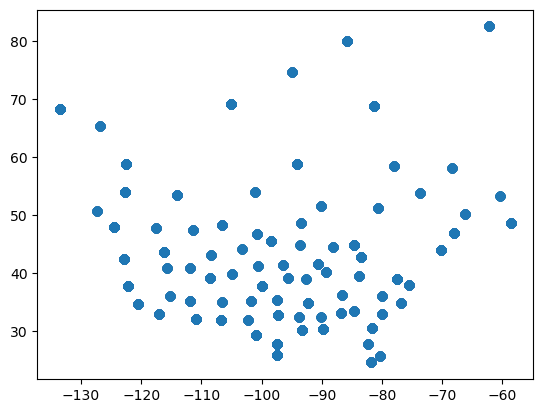

In [16]:
plt.scatter(df['longitude'], df['latitude'])